In [12]:
import yfinance as yf
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller

In [2]:
# --- Step 1: Fetch Data ---
# Define the tickers and date range
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-07-01'
end_date = '2025-07-31'

In [3]:
# Fetch the data
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)

close_prices = data['Close']

print("Data downloaded successfully.")
print("Original Data Head:")
print(close_prices.head())


[*********************100%***********************]  3 of 3 completed

Data downloaded successfully.
Original Data Head:
Ticker            BND         SPY       TSLA
Date                                        
2015-07-01  60.816719  174.917130  17.943333
2015-07-02  60.967091  174.756958  18.667999
2015-07-06  61.177593  174.259644  18.648001
2015-07-07  61.237736  175.355484  17.858667
2015-07-08  61.410656  172.413498  16.997334


In [4]:
# --- Step 2: Clean Data ---
print("\nInitial missing values count:")
print(close_prices.isnull().sum())
close_prices.fillna(method='ffill', inplace=True)
print("\nMissing values count after cleaning:")
print(close_prices.isnull().sum())
print("\nCleaned Data Head:")
print(close_prices.head())


Initial missing values count:
Ticker
BND     0
SPY     0
TSLA    0
dtype: int64

Missing values count after cleaning:
Ticker
BND     0
SPY     0
TSLA    0
dtype: int64

Cleaned Data Head:
Ticker            BND         SPY       TSLA
Date                                        
2015-07-01  60.816719  174.917130  17.943333
2015-07-02  60.967091  174.756958  18.667999
2015-07-06  61.177593  174.259644  18.648001
2015-07-07  61.237736  175.355484  17.858667
2015-07-08  61.410656  172.413498  16.997334


C:\Users\Bisrat\AppData\Local\Temp\ipykernel_832\1000600159.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  close_prices.fillna(method='ffill', inplace=True)
C:\Users\Bisrat\AppData\Local\Temp\ipykernel_832\1000600159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices.fillna(method='ffill', inplace=True)


In [7]:
close_prices.to_csv('../data/processed_data.csv')
print("\nCleaned data saved to 'data/processed_data.csv'")


Cleaned data saved to 'data/processed_data.csv'


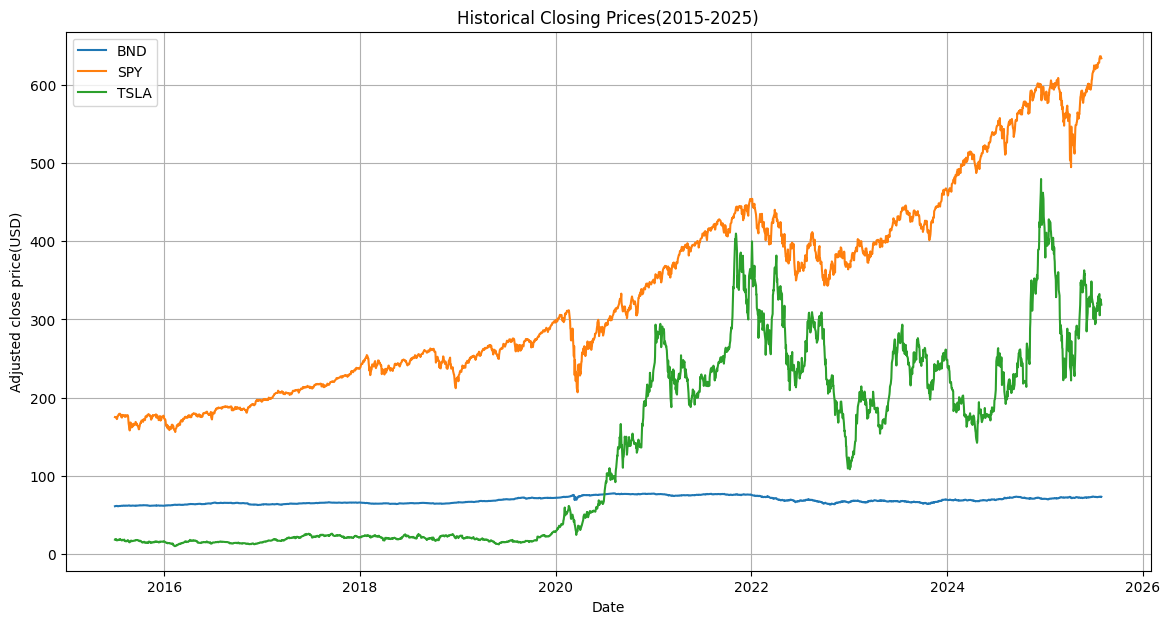

In [9]:
# --- Step 3.A: Visualize Closing Prices ---
plt.figure(figsize=(14,7))
for ticker in close_prices.columns:
    plt.plot(close_prices.index, close_prices[ticker], label=ticker)
plt.title('Historical Closing Prices(2015-2025)')
plt.xlabel('Date')
plt.ylabel('Adjusted close price(USD)')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# --- Step 3.B: Calculate and Plot Daily Returns ---
daily_returns = close_prices.pct_change().dropna()
print("\nHead of Daily Returns DataFrame:")
print(daily_returns.head())


Head of Daily Returns DataFrame:
Ticker           BND       SPY      TSLA
Date                                    
2015-07-02  0.002473 -0.000916  0.040386
2015-07-06  0.003453 -0.002846 -0.001071
2015-07-07  0.000983  0.006289 -0.042328
2015-07-08  0.002824 -0.016777 -0.048231
2015-07-09 -0.003306  0.001809  0.011610


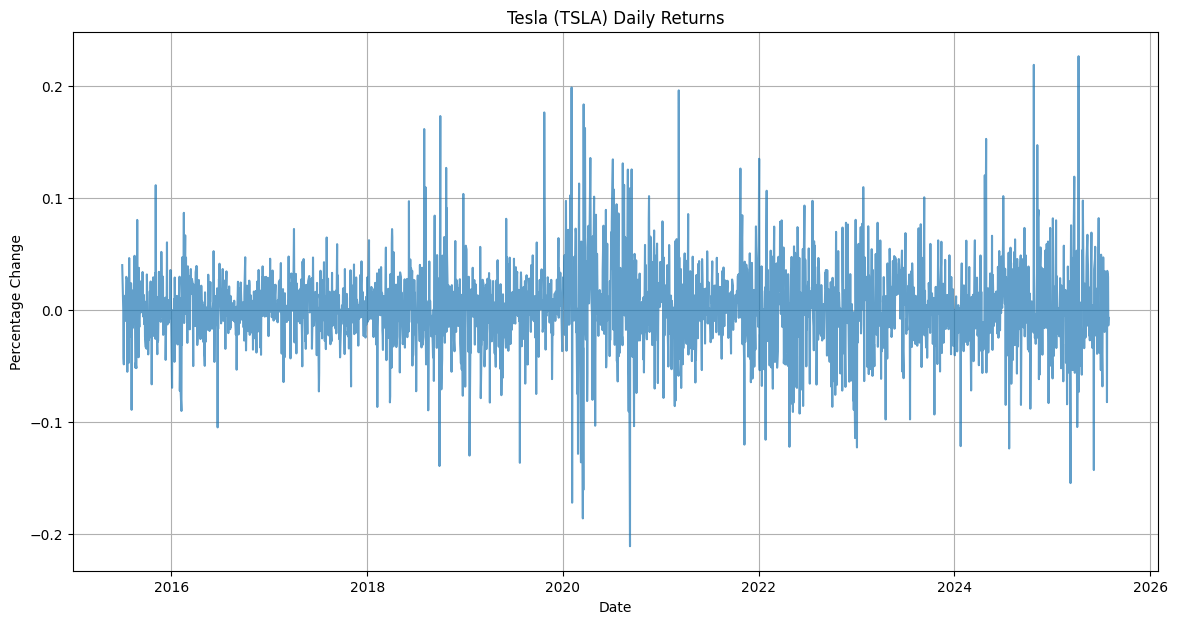

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(daily_returns.index, daily_returns['TSLA'], label='TSLA Daily Returns', alpha=0.7)
plt.title('Tesla (TSLA) Daily Returns')
plt.ylabel('Percentage Change')
plt.xlabel('Date')
plt.grid(True)
plt.show()

In [13]:
# --- Step 3.C: Stationarity Test ---
print("\n--- Testing TSLA Closing Prices ---")
adf_price_test = adfuller(close_prices['TSLA'])
print(f'ADF Statistic: {adf_price_test[0]}')
print(f'p-value: {adf_price_test[1]}')
print("Is the data stationary? " + ("Yes" if adf_price_test[1] <= 0.05 else "No"))


--- Testing TSLA Closing Prices ---
ADF Statistic: -1.4188720053968273
p-value: 0.5731959514207222
Is the data stationary? No


In [14]:
print("\n--- Testing TSLA Daily Returns ---")
adf_returns_test = adfuller(daily_returns['TSLA'])
print(f'ADF Statistic: {adf_returns_test[0]}')
print(f'p-value: {adf_returns_test[1]}')
print("Is the data stationary? " + ("Yes" if adf_returns_test[1] <= 0.05 else "No"))


--- Testing TSLA Daily Returns ---
ADF Statistic: -34.68109047254185
p-value: 0.0
Is the data stationary? Yes
